# 기본 라이브러리 import 및 글자 설정

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# user_data

In [2]:
user_data=pd.read_csv('data2/user.csv')
user_data

,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre
0,1,7201,2022-10-12 13:02:17.591454,unknown,2018-05-11 16:40:21.438831,"[""vlog""]"
1,12,49,2021-10-08 12:57:26.888627,individual,2018-05-30 14:03:40.989853,[]
2,29,23,2022-07-27 15:19:21.166285,student,2018-08-02 20:53:28.357226,[]
3,30,241,2022-08-24 09:59:47.362796,unknown,2018-08-06 11:40:28.257467,NaN
4,31,0,NaN,unknown,2018-08-07 09:33:28.384289,NaN
...,...,...,...,...,...,...
102789,118123,1,2022-10-12 16:55:58.940188,individual,2022-10-12 16:55:58.794543,NaN
102790,118124,1,2022-10-12 17:01:59.327448,unknown,2022-10-12 17:00:33.539441,NaN
102791,118125,1,2022-10-12 17:08:15.513844,corporate,2022-10-12 17:08:15.45703,NaN
102792,118126,1,2022-10-12 17:13:04.84597,individual,2022-10-12 17:13:04.794371,NaN


## favorite_genre 빈칸 처리 및 리스트로 변환 

In [3]:
user_copy=user_data.copy()
user_copy['favorite_genre']=user_copy['favorite_genre'].fillna('[]').apply(lambda x: x[1:-1].replace('\"','').replace(' ','').split(','))
user_copy

,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre
0,1,7201,2022-10-12 13:02:17.591454,unknown,2018-05-11 16:40:21.438831,[vlog]
1,12,49,2021-10-08 12:57:26.888627,individual,2018-05-30 14:03:40.989853,[]
2,29,23,2022-07-27 15:19:21.166285,student,2018-08-02 20:53:28.357226,[]
3,30,241,2022-08-24 09:59:47.362796,unknown,2018-08-06 11:40:28.257467,[]
4,31,0,NaN,unknown,2018-08-07 09:33:28.384289,[]
...,...,...,...,...,...,...
102789,118123,1,2022-10-12 16:55:58.940188,individual,2022-10-12 16:55:58.794543,[]
102790,118124,1,2022-10-12 17:01:59.327448,unknown,2022-10-12 17:00:33.539441,[]
102791,118125,1,2022-10-12 17:08:15.513844,corporate,2022-10-12 17:08:15.45703,[]
102792,118126,1,2022-10-12 17:13:04.84597,individual,2022-10-12 17:13:04.794371,[]


## favorite_genre 결측치행 제거 및 기타 칼럼 형변환

In [4]:
user_copy['not_empty']=user_copy['favorite_genre'].apply(lambda x: False if '' in x else True)
user_copy=user_copy[user_copy['not_empty']]
user_copy=user_copy[user_copy['last_sign_in_at'].notnull()]

user_copy['last_sign_in_at']=pd.to_datetime(user_copy['last_sign_in_at']).dt.strftime('%Y%m%d').astype('int')
user_copy['created_at']=pd.to_datetime(user_copy['created_at']).dt.strftime('%Y%m%d').astype('int')
user_copy

,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre,not_empty
0,1,7201,20221012,unknown,20180511,[vlog],True
7,40,20,20201205,unknown,20180910,"[vlog, game]",True
8,45,11,20210608,unknown,20181011,[vlog],True
17,161,67,20210403,unknown,20181229,[pet],True
38,350,3,20210625,unknown,20190105,[story],True
...,...,...,...,...,...,...,...
72422,86032,1,20211208,corporate,20211208,[review],True
72424,86034,1,20211208,unknown,20211208,[story],True
72426,86036,1,20211208,unknown,20211208,"[talk, game]",True
72427,86037,1,20211208,unknown,20211208,[game],True


## favorite_genre 장르종류 추출

In [5]:
genre_set=set()
for i in user_copy['favorite_genre']:
  genre_set.update(set(i))
genre_list=list(genre_set)
genre_list

['kids',
 'story',
 'vlog',
 'beauty',
 'review',
 'game',
 'eating',
 'drone',
 'talk',
 'pet']

## 장르 칼럼화

In [6]:
for i in genre_list:
  user_copy[i]=user_copy['favorite_genre'].apply(lambda x: 1 if i in x else 0)
user_copy

,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre,not_empty,kids,story,vlog,beauty,review,game,eating,drone,talk,pet
0,1,7201,20221012,unknown,20180511,[vlog],True,0,0,1,0,0,0,0,0,0,0
7,40,20,20201205,unknown,20180910,"[vlog, game]",True,0,0,1,0,0,1,0,0,0,0
8,45,11,20210608,unknown,20181011,[vlog],True,0,0,1,0,0,0,0,0,0,0
17,161,67,20210403,unknown,20181229,[pet],True,0,0,0,0,0,0,0,0,0,1
38,350,3,20210625,unknown,20190105,[story],True,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72422,86032,1,20211208,corporate,20211208,[review],True,0,0,0,0,1,0,0,0,0,0
72424,86034,1,20211208,unknown,20211208,[story],True,0,1,0,0,0,0,0,0,0,0
72426,86036,1,20211208,unknown,20211208,"[talk, game]",True,0,0,0,0,0,1,0,0,1,0
72427,86037,1,20211208,unknown,20211208,[game],True,0,0,0,0,0,1,0,0,0,0


## user_type 수치화

In [7]:
usertype_list=list(user_copy['user_type'].unique())
user_copy['user_type']=user_copy['user_type'].apply(lambda x: usertype_list.index(x))
user_copy

,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre,not_empty,kids,story,vlog,beauty,review,game,eating,drone,talk,pet
0,1,7201,20221012,0,20180511,[vlog],True,0,0,1,0,0,0,0,0,0,0
7,40,20,20201205,0,20180910,"[vlog, game]",True,0,0,1,0,0,1,0,0,0,0
8,45,11,20210608,0,20181011,[vlog],True,0,0,1,0,0,0,0,0,0,0
17,161,67,20210403,0,20181229,[pet],True,0,0,0,0,0,0,0,0,0,1
38,350,3,20210625,0,20190105,[story],True,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72422,86032,1,20211208,1,20211208,[review],True,0,0,0,0,1,0,0,0,0,0
72424,86034,1,20211208,0,20211208,[story],True,0,1,0,0,0,0,0,0,0,0
72426,86036,1,20211208,0,20211208,"[talk, game]",True,0,0,0,0,0,1,0,0,1,0
72427,86037,1,20211208,0,20211208,[game],True,0,0,0,0,0,1,0,0,0,0


## 각종 칼럼 drop

In [8]:
user_copy=user_copy.drop(columns=['favorite_genre','not_empty'])
user_copy

,id,sign_in_count,last_sign_in_at,user_type,created_at,kids,story,vlog,beauty,review,game,eating,drone,talk,pet
0,1,7201,20221012,0,20180511,0,0,1,0,0,0,0,0,0,0
7,40,20,20201205,0,20180910,0,0,1,0,0,1,0,0,0,0
8,45,11,20210608,0,20181011,0,0,1,0,0,0,0,0,0,0
17,161,67,20210403,0,20181229,0,0,0,0,0,0,0,0,0,1
38,350,3,20210625,0,20190105,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72422,86032,1,20211208,1,20211208,0,0,0,0,1,0,0,0,0,0
72424,86034,1,20211208,0,20211208,0,1,0,0,0,0,0,0,0,0
72426,86036,1,20211208,0,20211208,0,0,0,0,0,1,0,0,1,0
72427,86037,1,20211208,0,20211208,0,0,0,0,0,1,0,0,0,0


In [9]:
user_copy=user_copy.drop(columns=['sign_in_count','last_sign_in_at','created_at'])
user_copy

,id,user_type,kids,story,vlog,beauty,review,game,eating,drone,talk,pet
0,1,0,0,0,1,0,0,0,0,0,0,0
7,40,0,0,0,1,0,0,1,0,0,0,0
8,45,0,0,0,1,0,0,0,0,0,0,0
17,161,0,0,0,0,0,0,0,0,0,0,1
38,350,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
72422,86032,1,0,0,0,0,1,0,0,0,0,0
72424,86034,0,0,1,0,0,0,0,0,0,0,0
72426,86036,0,0,0,0,0,0,1,0,0,1,0
72427,86037,0,0,0,0,0,0,1,0,0,0,0


In [10]:
user_copy=user_copy.drop(columns=['user_type'])
user_copy

,id,kids,story,vlog,beauty,review,game,eating,drone,talk,pet
0,1,0,0,1,0,0,0,0,0,0,0
7,40,0,0,1,0,0,1,0,0,0,0
8,45,0,0,1,0,0,0,0,0,0,0
17,161,0,0,0,0,0,0,0,0,0,1
38,350,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
72422,86032,0,0,0,0,1,0,0,0,0,0
72424,86034,0,1,0,0,0,0,0,0,0,0
72426,86036,0,0,0,0,0,1,0,0,1,0
72427,86037,0,0,0,0,0,1,0,0,0,0


# user_data 클러스터링

## 차원축소 및 scatter그래프, 히트맵 확인

In [11]:
# 2차원으로 축소
# from sklearn.preprocessing import StandardScaler
# std_scaler=StandardScaler()
# std_scaler.fit(user_copy.iloc[:,1:])
# data=std_scaler.transform(user_copy.iloc[:,1:])
data=user_copy.iloc[:,1:]
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data)
data_pca=pca.transform(data)
data_pca.shape

(19004, 2)

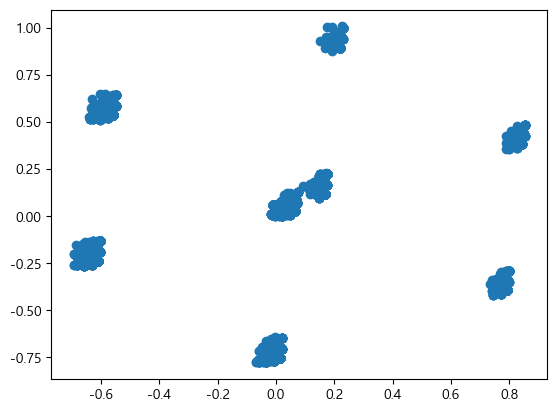

In [12]:
plt.scatter(data_pca[:,0],data_pca[:,1])
plt.show()

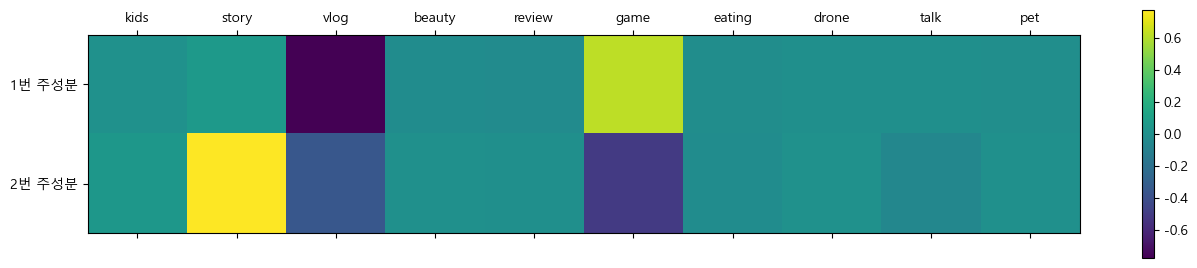

In [13]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1번 주성분','2번 주성분'])
plt.colorbar()
plt.xticks(range(10),user_copy.columns[1:])
plt.show()

## DBSCAN

In [14]:
# # DB scan(밀도 기반으로 클러스터링)
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.1, min_samples =3)

# 시각화를 위한 데이터프레임 생성
df_data_pca = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
df_data_pca['cluster'] = dbs.fit_predict(data_pca)

df_data_pca

,PC1,PC2,cluster
0,-0.610584,-0.179723,0
1,0.013286,-0.693313,1
2,-0.610584,-0.179723,0
3,0.156976,0.177779,2
4,0.222407,0.953238,3
...,...,...,...
18999,0.141152,0.169928,2
19000,0.222407,0.953238,3
19001,0.790702,-0.394526,5
19002,0.791712,-0.337184,5


In [15]:
df_data_pca['cluster'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

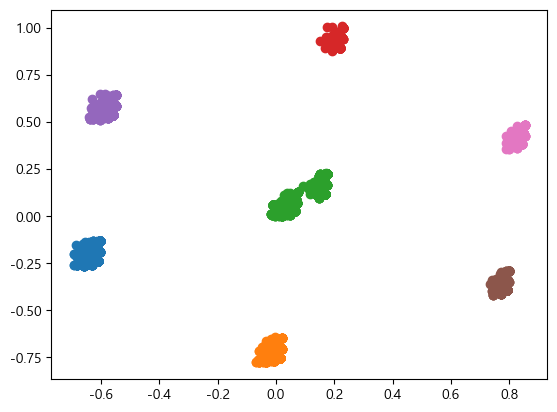

In [16]:
for i in df_data_pca['cluster'].unique():
  data=df_data_pca[df_data_pca['cluster']==i]
  plt.scatter(data['PC1'],data['PC2'])
plt.show()

## KMeans

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 8,random_state=0)
df_data_pca['cluster_kmeans']= km.fit_predict(df_data_pca)
df_data_pca

,PC1,PC2,cluster,cluster_kmeans
0,-0.610584,-0.179723,0,2
1,0.013286,-0.693313,1,5
2,-0.610584,-0.179723,0,2
3,0.156976,0.177779,2,0
4,0.222407,0.953238,3,3
...,...,...,...,...
18999,0.141152,0.169928,2,0
19000,0.222407,0.953238,3,3
19001,0.790702,-0.394526,5,1
19002,0.791712,-0.337184,5,1


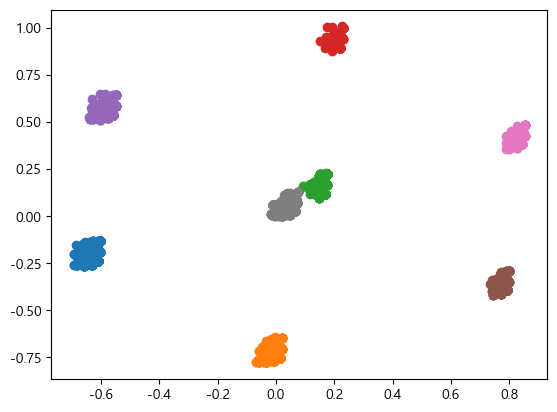

In [18]:
for i in df_data_pca['cluster_kmeans'].unique():
  data=df_data_pca[df_data_pca['cluster_kmeans']==i]
  plt.scatter(data['PC1'],data['PC2'])
plt.show()

## 클러스터링 결과 merge

In [19]:
user_copy['클러스터_kmeans']=list(df_data_pca['cluster_kmeans'])
user_copy['클러스터_dbscan']=list(df_data_pca['cluster'])
user_copy

,id,kids,story,vlog,beauty,review,game,eating,drone,talk,pet,클러스터_kmeans,클러스터_dbscan
0,1,0,0,1,0,0,0,0,0,0,0,2,0
7,40,0,0,1,0,0,1,0,0,0,0,5,1
8,45,0,0,1,0,0,0,0,0,0,0,2,0
17,161,0,0,0,0,0,0,0,0,0,1,0,2
38,350,0,1,0,0,0,0,0,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72422,86032,0,0,0,0,1,0,0,0,0,0,0,2
72424,86034,0,1,0,0,0,0,0,0,0,0,3,3
72426,86036,0,0,0,0,0,1,0,0,1,0,1,5
72427,86037,0,0,0,0,0,1,0,0,0,0,1,5


In [20]:
user_copy.sum()

id             968975482
kids                1198
story               4158
vlog                9216
beauty               787
review              1312
game                6140
eating               809
drone                341
talk                3211
pet                  693
클러스터_kmeans        39045
클러스터_dbscan        42004
dtype: int64

In [21]:
df_clustered_user=user_data.merge(user_copy,how='left',left_on='id',right_on='id')
df_clustered_user=df_clustered_user[df_clustered_user['클러스터_kmeans'].notnull()]
df_clustered_user

,id,sign_in_count,last_sign_in_at,user_type,created_at,favorite_genre,kids,story,vlog,beauty,review,game,eating,drone,talk,pet,클러스터_kmeans,클러스터_dbscan
0,1,7201,2022-10-12 13:02:17.591454,unknown,2018-05-11 16:40:21.438831,"[""vlog""]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
7,40,20,2020-12-05 16:12:42.304513,unknown,2018-09-10 16:58:19.698373,"[""vlog"", ""game""]",0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0
8,45,11,2021-06-08 23:35:02.382648,unknown,2018-10-11 11:30:44.556281,"[""vlog""]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
17,161,67,2021-04-03 09:47:40.876126,unknown,2018-12-29 18:28:30.890291,"[""pet""]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
38,350,3,2021-06-25 13:11:38.364806,unknown,2019-01-05 19:19:26.918876,"[""story""]",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72422,86032,1,2021-12-08 15:52:49.511953,corporate,2021-12-08 15:52:07.771487,"[""review""]",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
72424,86034,1,2021-12-08 16:00:55.222449,unknown,2021-12-08 15:58:18.164371,"[""story""]",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
72426,86036,1,2021-12-08 16:04:43.798833,unknown,2021-12-08 16:03:29.785138,"[""talk"", ""game""]",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5.0
72427,86037,1,2021-12-08 16:05:22.19967,unknown,2021-12-08 16:04:57.110703,"[""game""]",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0


## 클러스터별 통계확인

In [22]:
df_clustered_user.groupby('클러스터_kmeans').sum().drop(columns=['클러스터_dbscan'])

,id,sign_in_count,kids,story,vlog,beauty,review,game,eating,drone,talk,pet
클러스터_kmeans,,,,,,,,,,,,
0.0,130674310,14372,617.0,0.0,0.0,182.0,345.0,0.0,134.0,122.0,1023.0,222.0
1.0,243494122,24480,52.0,0.0,0.0,14.0,72.0,4455.0,43.0,3.0,381.0,23.0
2.0,335392249,47592,177.0,0.0,6961.0,219.0,344.0,0.0,207.0,48.0,656.0,174.0
3.0,117363811,10303,58.0,2485.0,0.0,22.0,35.0,0.0,12.0,8.0,97.0,12.0
4.0,46316582,4705,53.0,872.0,872.0,89.0,123.0,0.0,69.0,31.0,258.0,34.0
5.0,48823539,6676,39.0,0.0,884.0,75.0,152.0,884.0,132.0,19.0,400.0,53.0
6.0,17550399,1616,19.0,302.0,0.0,8.0,32.0,302.0,10.0,6.0,57.0,12.0
7.0,29360470,3543,183.0,499.0,499.0,178.0,209.0,499.0,202.0,104.0,339.0,163.0


In [23]:
df_clustered_user.groupby('클러스터_dbscan').sum().drop(columns=['클러스터_kmeans'])

,id,sign_in_count,kids,story,vlog,beauty,review,game,eating,drone,talk,pet
클러스터_dbscan,,,,,,,,,,,,
0.0,335392249,47592,177.0,0.0,6961.0,219.0,344.0,0.0,207.0,48.0,656.0,174.0
1.0,48823539,6676,39.0,0.0,884.0,75.0,152.0,884.0,132.0,19.0,400.0,53.0
2.0,160034780,17915,800.0,499.0,499.0,360.0,554.0,499.0,336.0,226.0,1362.0,385.0
3.0,117363811,10303,58.0,2485.0,0.0,22.0,35.0,0.0,12.0,8.0,97.0,12.0
4.0,46316582,4705,53.0,872.0,872.0,89.0,123.0,0.0,69.0,31.0,258.0,34.0
5.0,243494122,24480,52.0,0.0,0.0,14.0,72.0,4455.0,43.0,3.0,381.0,23.0
6.0,17550399,1616,19.0,302.0,0.0,8.0,32.0,302.0,10.0,6.0,57.0,12.0


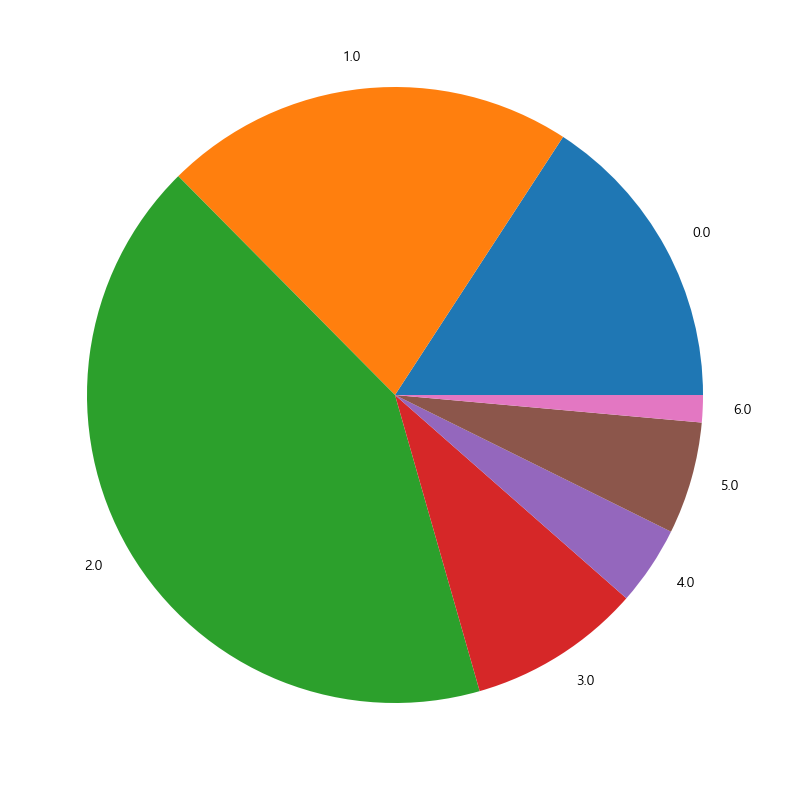

In [24]:
plt.figure(figsize=(10,10))
data=[17915,24480,47592,10303,4705,6676,1616]
plt.pie(data,labels=df_clustered_user.groupby('클러스터_dbscan').count()['id'].index)
plt.show()

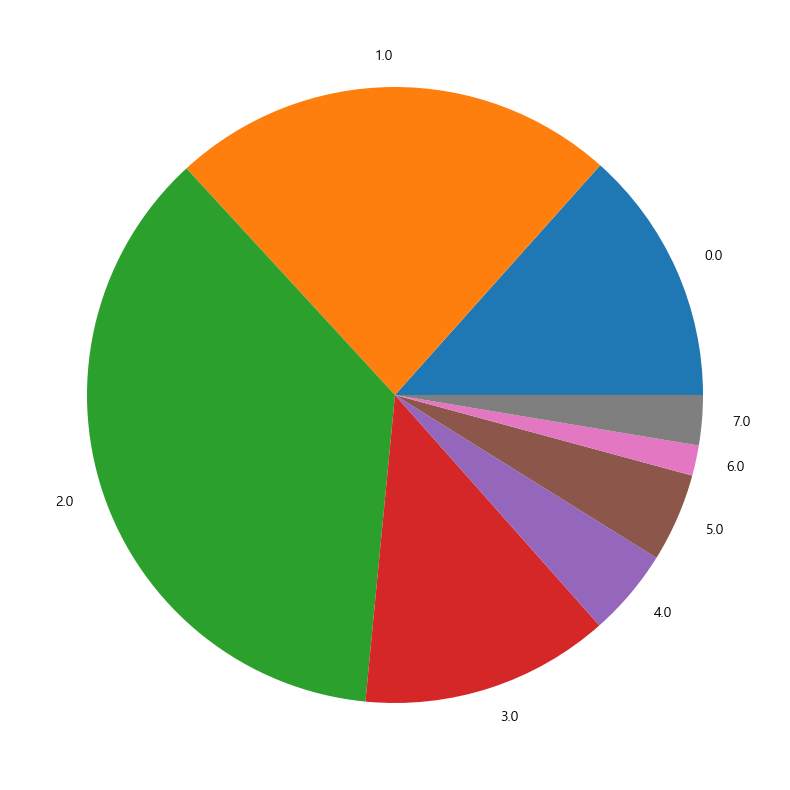

In [25]:
plt.figure(figsize=(10,10))
plt.pie(df_clustered_user.groupby('클러스터_kmeans').count()['id'],labels=df_clustered_user.groupby('클러스터_kmeans').count()['id'].index)
plt.show()

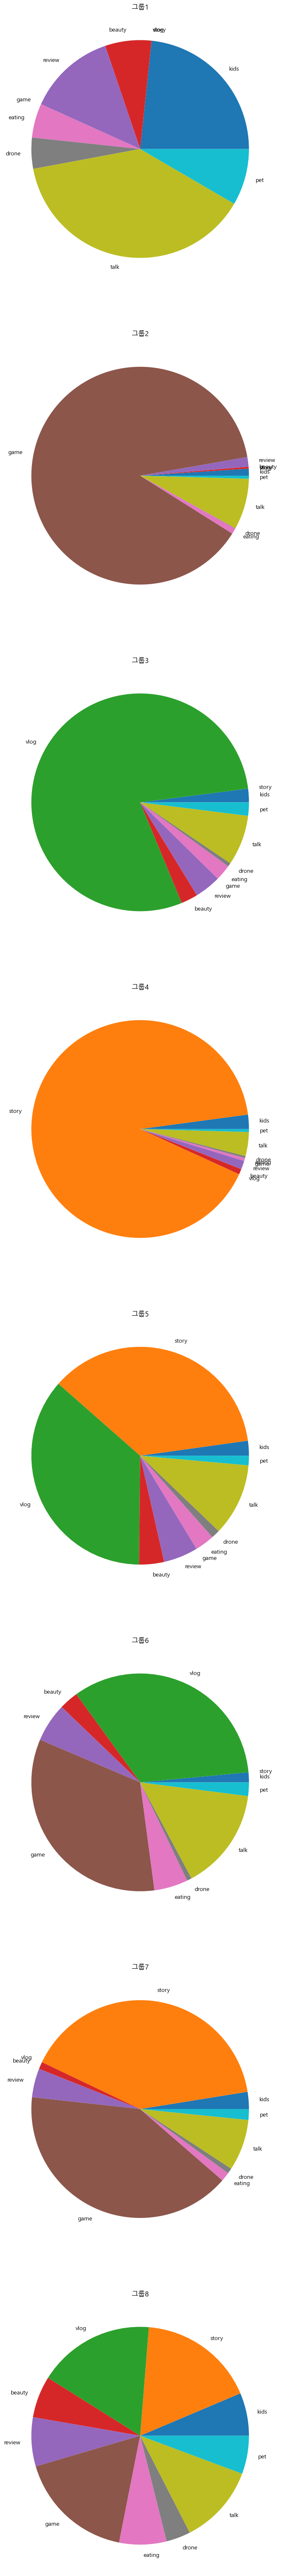

In [26]:
calc_kmeans=df_clustered_user.groupby('클러스터_kmeans').sum().drop(columns=['id','sign_in_count','클러스터_dbscan'])
plt.figure(figsize=(10,80))
for i in range(len(calc_kmeans)):
    plt.subplot(len(calc_kmeans),1,i+1)
    plt.pie(calc_kmeans.iloc[i],labels=calc_kmeans.columns)
    plt.title(f'그룹{i+1}')
plt.show()

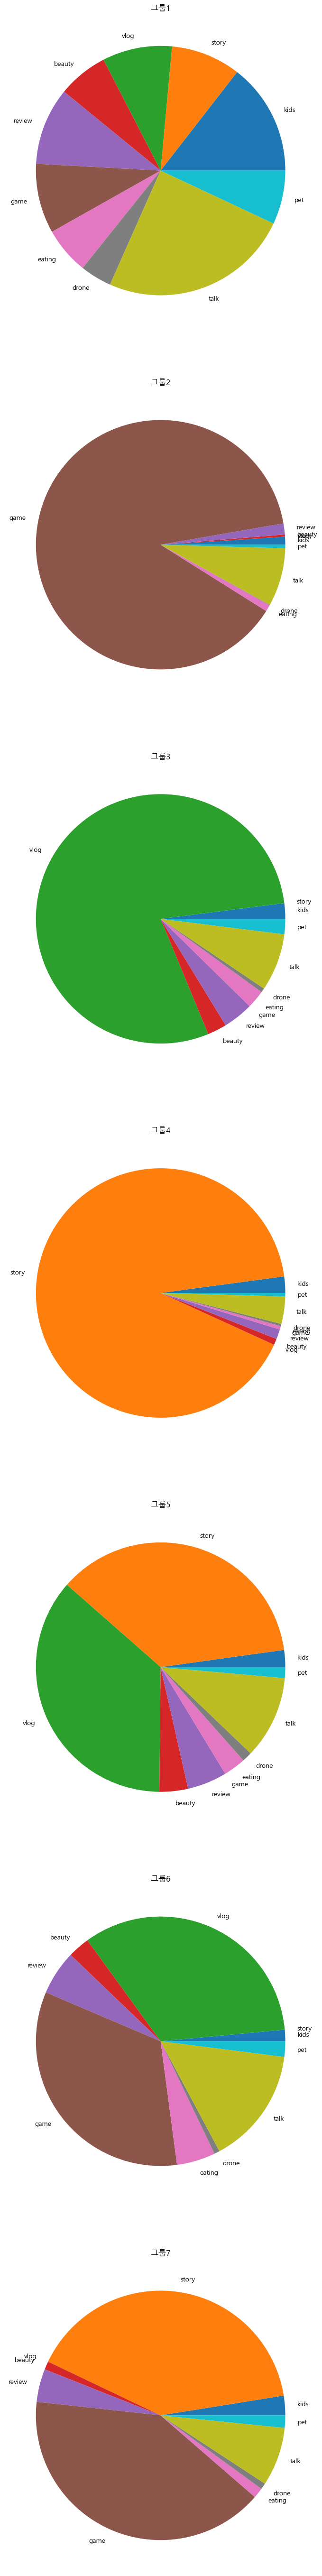

In [27]:
calc_dbscan=df_clustered_user.groupby('클러스터_dbscan').sum().drop(columns=['id','sign_in_count','클러스터_kmeans'])
order=[2,5,0,3,4,1,6]
plt.figure(figsize=(10,70))
for i in range(len(calc_dbscan)):
    plt.subplot(len(calc_dbscan),1,i+1)
    plt.pie(calc_dbscan.iloc[order[i]],labels=calc_dbscan.columns)
    plt.title(f'그룹{i+1}')
plt.show()

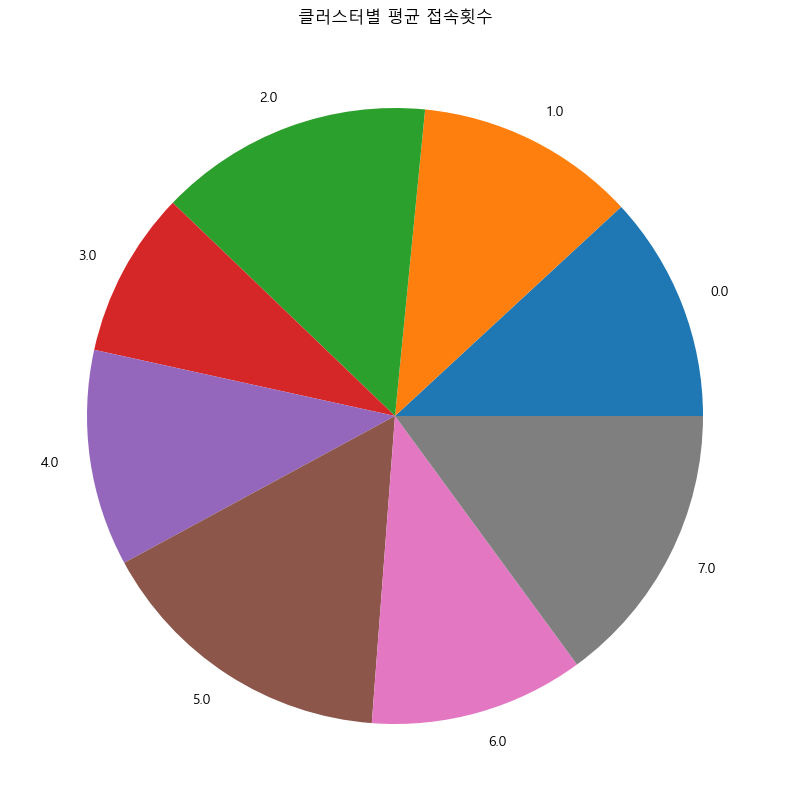

In [28]:
data=df_clustered_user.groupby('클러스터_kmeans').mean()['sign_in_count']
plt.figure(figsize=(10,10))
plt.pie(data,labels=data.index)
plt.title('클러스터별 평균 접속횟수')
plt.show()

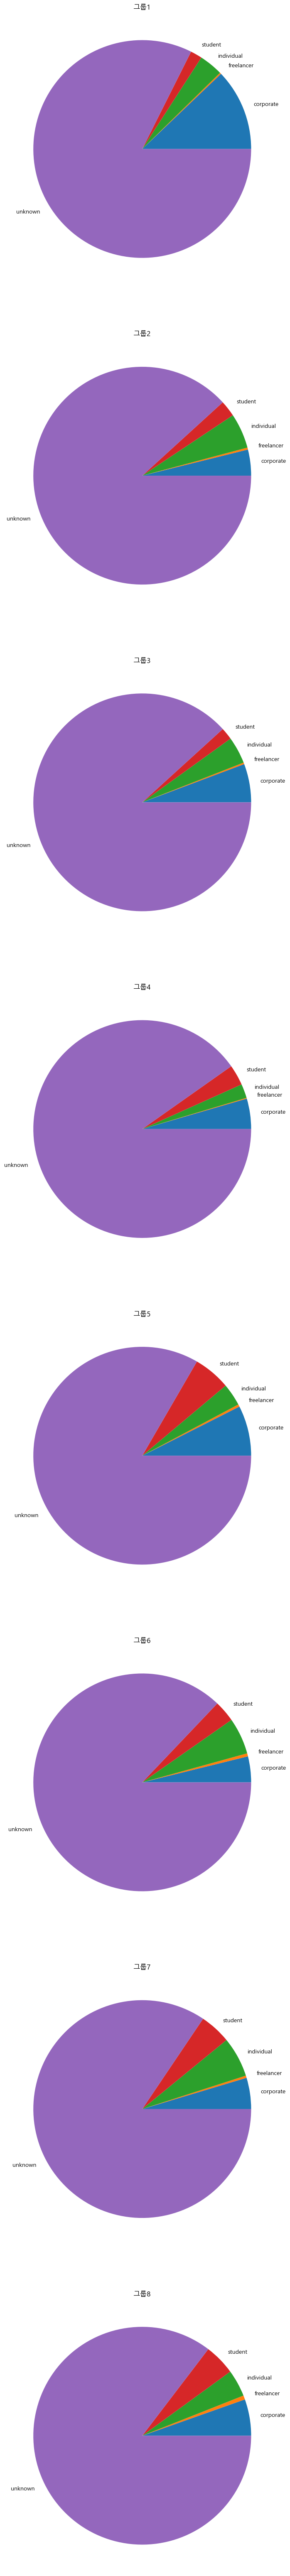

In [29]:
user_type_pivot=pd.pivot_table(df_clustered_user,index=['클러스터_kmeans'],columns=['user_type'],values=['id'],aggfunc='count')['id']
plt.figure(figsize=(10,80))
for i in range(len(user_type_pivot)):
    plt.subplot(len(user_type_pivot),1,i+1)
    plt.pie(user_type_pivot.iloc[i],labels=user_type_pivot.columns)
    plt.title(f'그룹{i+1}')
plt.show()